In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os
import pandas as pd
import zipfile

# Path to your ZIP file and the output CSV
zip_path = '/content/drive/MyDrive/Capstone_Lavs/Project.zip'


# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Project')

# Walk through the extracted folders and create the CSV data
data = []
root_path = 'Project'
for dirpath, dirnames, filenames in os.walk(root_path):
    for file in filenames:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            label = os.path.basename(dirpath)
            image_path = os.path.join(dirpath, file)
            data.append([image_path, label])

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data, columns=['Image_path', 'Label'])


In [4]:

df

,Image_path,Label
0,Project/Project/Jasmine/Jasmine (5734).jpg,Jasmine
1,Project/Project/Jasmine/Jasmine (529).jpg,Jasmine
2,Project/Project/Jasmine/Jasmine (12526).jpg,Jasmine
3,Project/Project/Jasmine/Jasmine (11154).jpg,Jasmine
4,Project/Project/Jasmine/Jasmine (260).jpg,Jasmine
...,...,...
74995,Project/Project/Karacadag/Karacadag (12242).jpg,Karacadag
74996,Project/Project/Karacadag/Karacadag (8400).jpg,Karacadag
74997,Project/Project/Karacadag/Karacadag (7958).jpg,Karacadag
74998,Project/Project/Karacadag/Karacadag (275).jpg,Karacadag


In [18]:
import pandas as pd
import cv2
import numpy as np

def classify_image(image_path):
    def get_classification(ratio):
        ratio = round(ratio, 1)
        return "Good Quality" if ratio > 1.36 else "Bad Quality"

    img = cv2.imread(image_path, 0)
    ret, binary = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.float32) / 9
    dst = cv2.filter2D(binary, -1, kernel)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    erosion = cv2.erode(dst, kernel2, iterations=1)
    dilation = cv2.dilate(erosion, kernel2, iterations=1)
    edges = cv2.Canny(dilation, 100, 200)
    contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    classifications = [get_classification(float(w)/h if w > h else float(h)/w) for x, y, w, h in (cv2.boundingRect(cnt) for cnt in contours)]

    if classifications:
        return max(set(classifications), key=classifications.count)
    return "Unknown"



# Apply function to each image path
df['Classification'] = df['Image_path'].apply(classify_image)

# Save to CSV



In [19]:
df

,Image_path,Label,Classification,Label_Quality
0,Project/Project/Jasmine/Jasmine (5734).jpg,Jasmine,Good Quality,Jasmine Good Quality
1,Project/Project/Jasmine/Jasmine (529).jpg,Jasmine,Good Quality,Jasmine Good Quality
2,Project/Project/Jasmine/Jasmine (12526).jpg,Jasmine,Good Quality,Jasmine Good Quality
3,Project/Project/Jasmine/Jasmine (11154).jpg,Jasmine,Good Quality,Jasmine Good Quality
4,Project/Project/Jasmine/Jasmine (260).jpg,Jasmine,Good Quality,Jasmine Good Quality
...,...,...,...,...
62995,Project/Project/Karacadag/Karacadag (1789).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62996,Project/Project/Karacadag/Karacadag (4030).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62997,Project/Project/Karacadag/Karacadag (2394).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62998,Project/Project/Karacadag/Karacadag (12844).jpg,Karacadag,Good Quality,Karacadag Good Quality


In [20]:
df['Label_Quality'] = df['Label'] + ' ' + df['Classification']

In [21]:
df

,Image_path,Label,Classification,Label_Quality
0,Project/Project/Jasmine/Jasmine (5734).jpg,Jasmine,Good Quality,Jasmine Good Quality
1,Project/Project/Jasmine/Jasmine (529).jpg,Jasmine,Good Quality,Jasmine Good Quality
2,Project/Project/Jasmine/Jasmine (12526).jpg,Jasmine,Good Quality,Jasmine Good Quality
3,Project/Project/Jasmine/Jasmine (11154).jpg,Jasmine,Good Quality,Jasmine Good Quality
4,Project/Project/Jasmine/Jasmine (260).jpg,Jasmine,Good Quality,Jasmine Good Quality
...,...,...,...,...
62995,Project/Project/Karacadag/Karacadag (1789).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62996,Project/Project/Karacadag/Karacadag (4030).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62997,Project/Project/Karacadag/Karacadag (2394).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62998,Project/Project/Karacadag/Karacadag (12844).jpg,Karacadag,Good Quality,Karacadag Good Quality


In [22]:
df

,Image_path,Label,Classification,Label_Quality
0,Project/Project/Jasmine/Jasmine (5734).jpg,Jasmine,Good Quality,Jasmine Good Quality
1,Project/Project/Jasmine/Jasmine (529).jpg,Jasmine,Good Quality,Jasmine Good Quality
2,Project/Project/Jasmine/Jasmine (12526).jpg,Jasmine,Good Quality,Jasmine Good Quality
3,Project/Project/Jasmine/Jasmine (11154).jpg,Jasmine,Good Quality,Jasmine Good Quality
4,Project/Project/Jasmine/Jasmine (260).jpg,Jasmine,Good Quality,Jasmine Good Quality
...,...,...,...,...
62995,Project/Project/Karacadag/Karacadag (1789).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62996,Project/Project/Karacadag/Karacadag (4030).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62997,Project/Project/Karacadag/Karacadag (2394).jpg,Karacadag,Bad Quality,Karacadag Bad Quality
62998,Project/Project/Karacadag/Karacadag (12844).jpg,Karacadag,Good Quality,Karacadag Good Quality


In [23]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['Label'].value_counts().reset_index()
df_counts.columns = ['Rice', 'Counts']

# Using a categorical color scale for the plants
fig = px.bar(df_counts,
             x='Rice',
             y='Counts',
             title='Value Counts for each type of rice',
             labels={'Type of Rice': 'Rice', 'Counts': 'Counts'},
             color='Rice',
             category_orders={"Rice": df_counts['Rice'].tolist()})

# Update the color scale
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))

# Show the plot
fig.show()

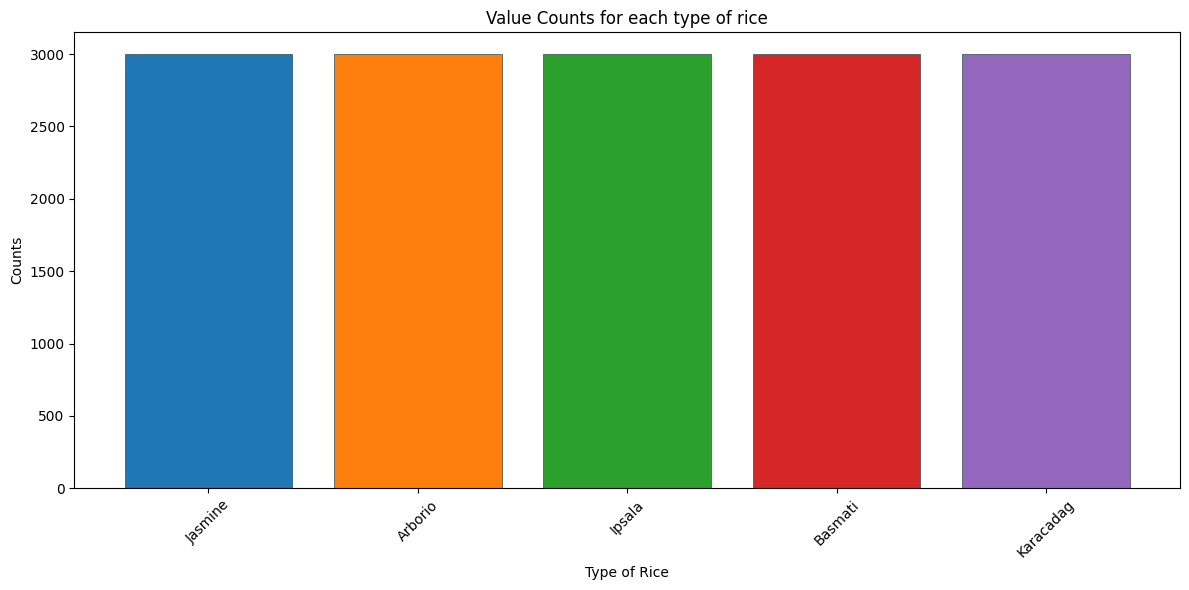

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

df_counts = df['Label'].value_counts().reset_index()
df_counts.columns = ['Rice', 'Counts']

rice_types = df_counts['Rice'].tolist()
counts = df_counts['Counts'].tolist()

plt.figure(figsize=(12,6))
bars = plt.bar(rice_types, counts, color=plt.cm.tab10.colors)

for bar in bars:
    bar.set_edgecolor('DarkSlateGrey')
    bar.set_linewidth(0.5)

plt.title('Value Counts for each type of rice')
plt.xlabel('Type of Rice')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


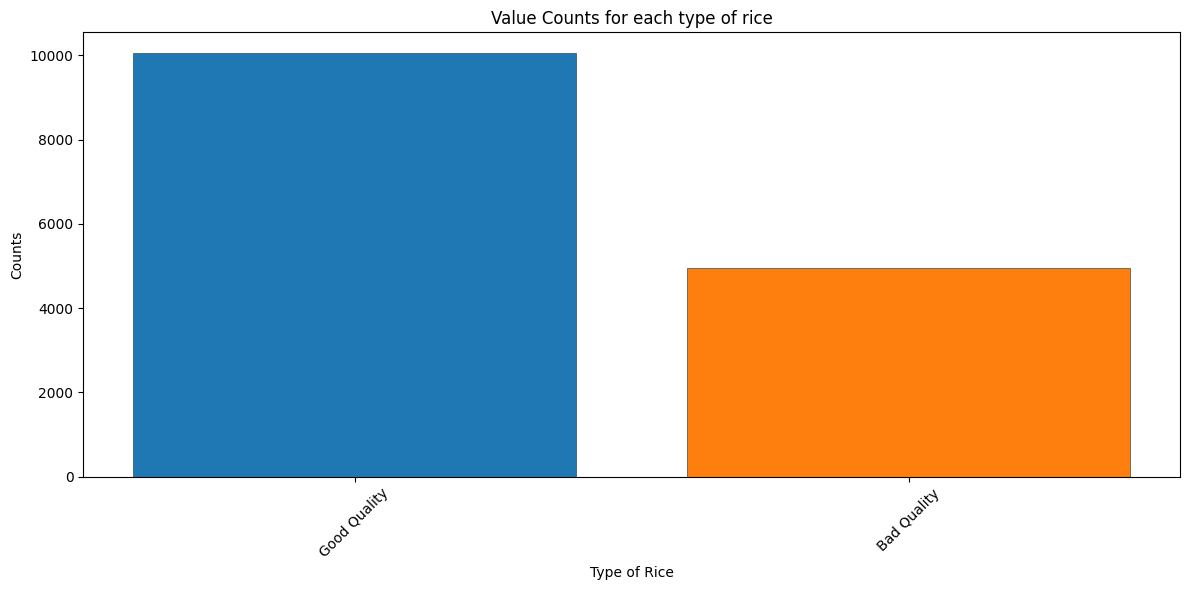

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

df_counts = df['Classification'].value_counts().reset_index()
df_counts.columns = ['Rice', 'Counts']

rice_types = df_counts['Rice'].tolist()
counts = df_counts['Counts'].tolist()

plt.figure(figsize=(12,6))
bars = plt.bar(rice_types, counts, color=plt.cm.tab10.colors)

for bar in bars:
    bar.set_edgecolor('DarkSlateGrey')
    bar.set_linewidth(0.5)

plt.title('Value Counts for each type of rice')
plt.xlabel('Type of Rice')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


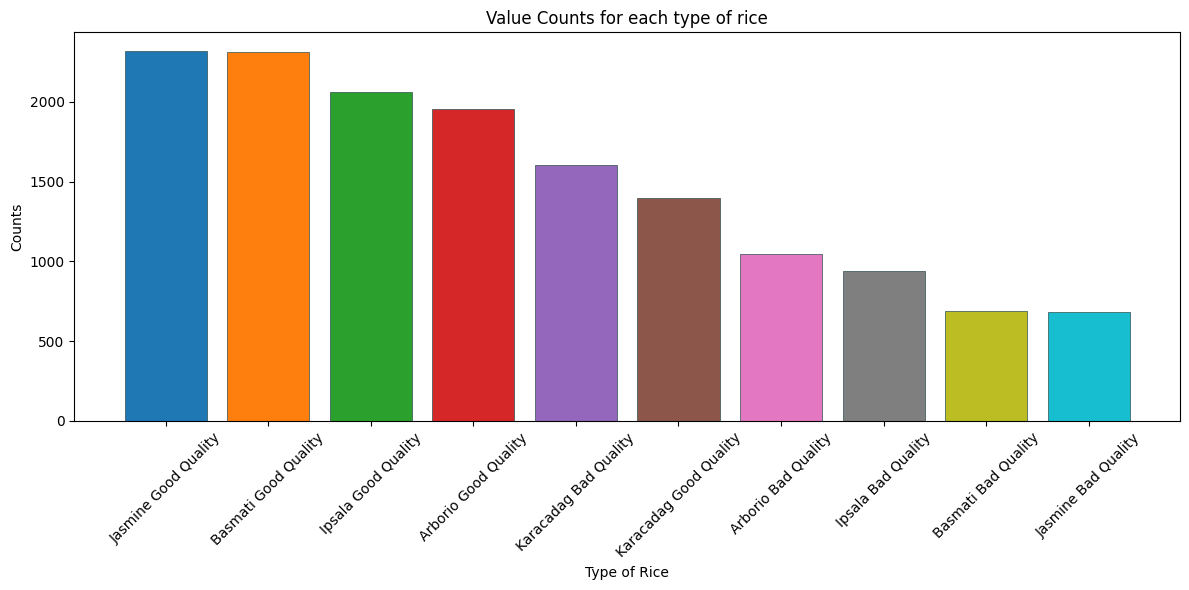

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

df_counts = df['Label_Quality'].value_counts().reset_index()
df_counts.columns = ['Rice', 'Counts']

rice_types = df_counts['Rice'].tolist()
counts = df_counts['Counts'].tolist()

plt.figure(figsize=(12,6))
bars = plt.bar(rice_types, counts, color=plt.cm.tab10.colors)

for bar in bars:
    bar.set_edgecolor('DarkSlateGrey')
    bar.set_linewidth(0.5)

plt.title('Value Counts for each type of rice')
plt.xlabel('Type of Rice')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


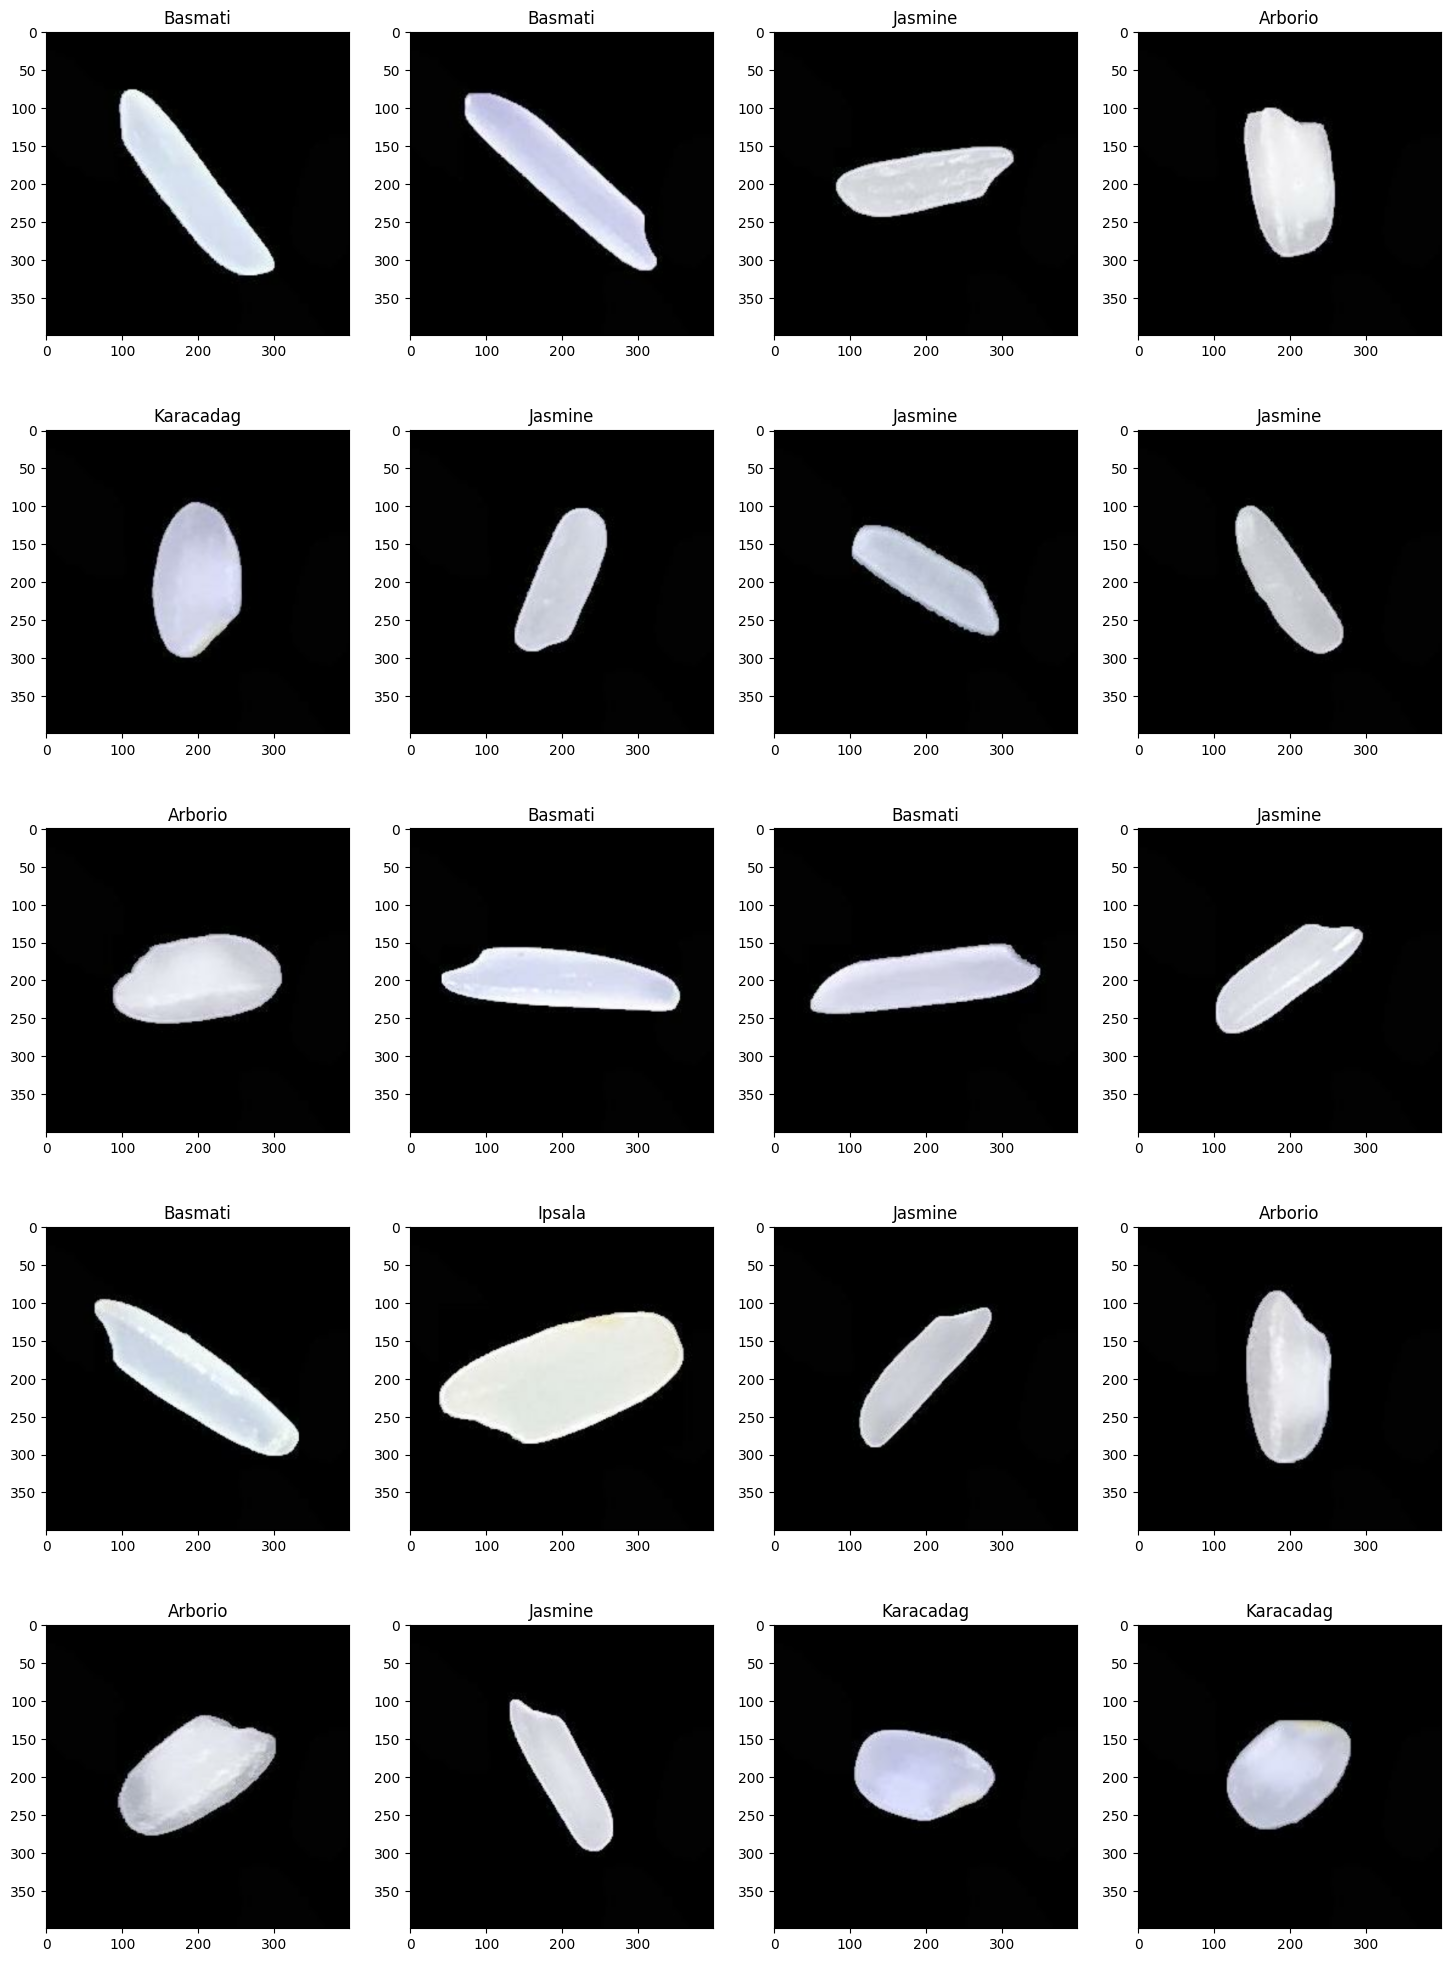

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,25))

# Randomly sample 20 rows from the dataframe
random_samples = df.sample(20)

for i, (index, row) in enumerate(random_samples.iterrows()):
    plt.subplot(5, 4, i + 1)

    image = tf.io.read_file(row['Image_path'])
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [400, 400])

    plt.imshow(image)
    plt.title(row['Label'])

plt.show()

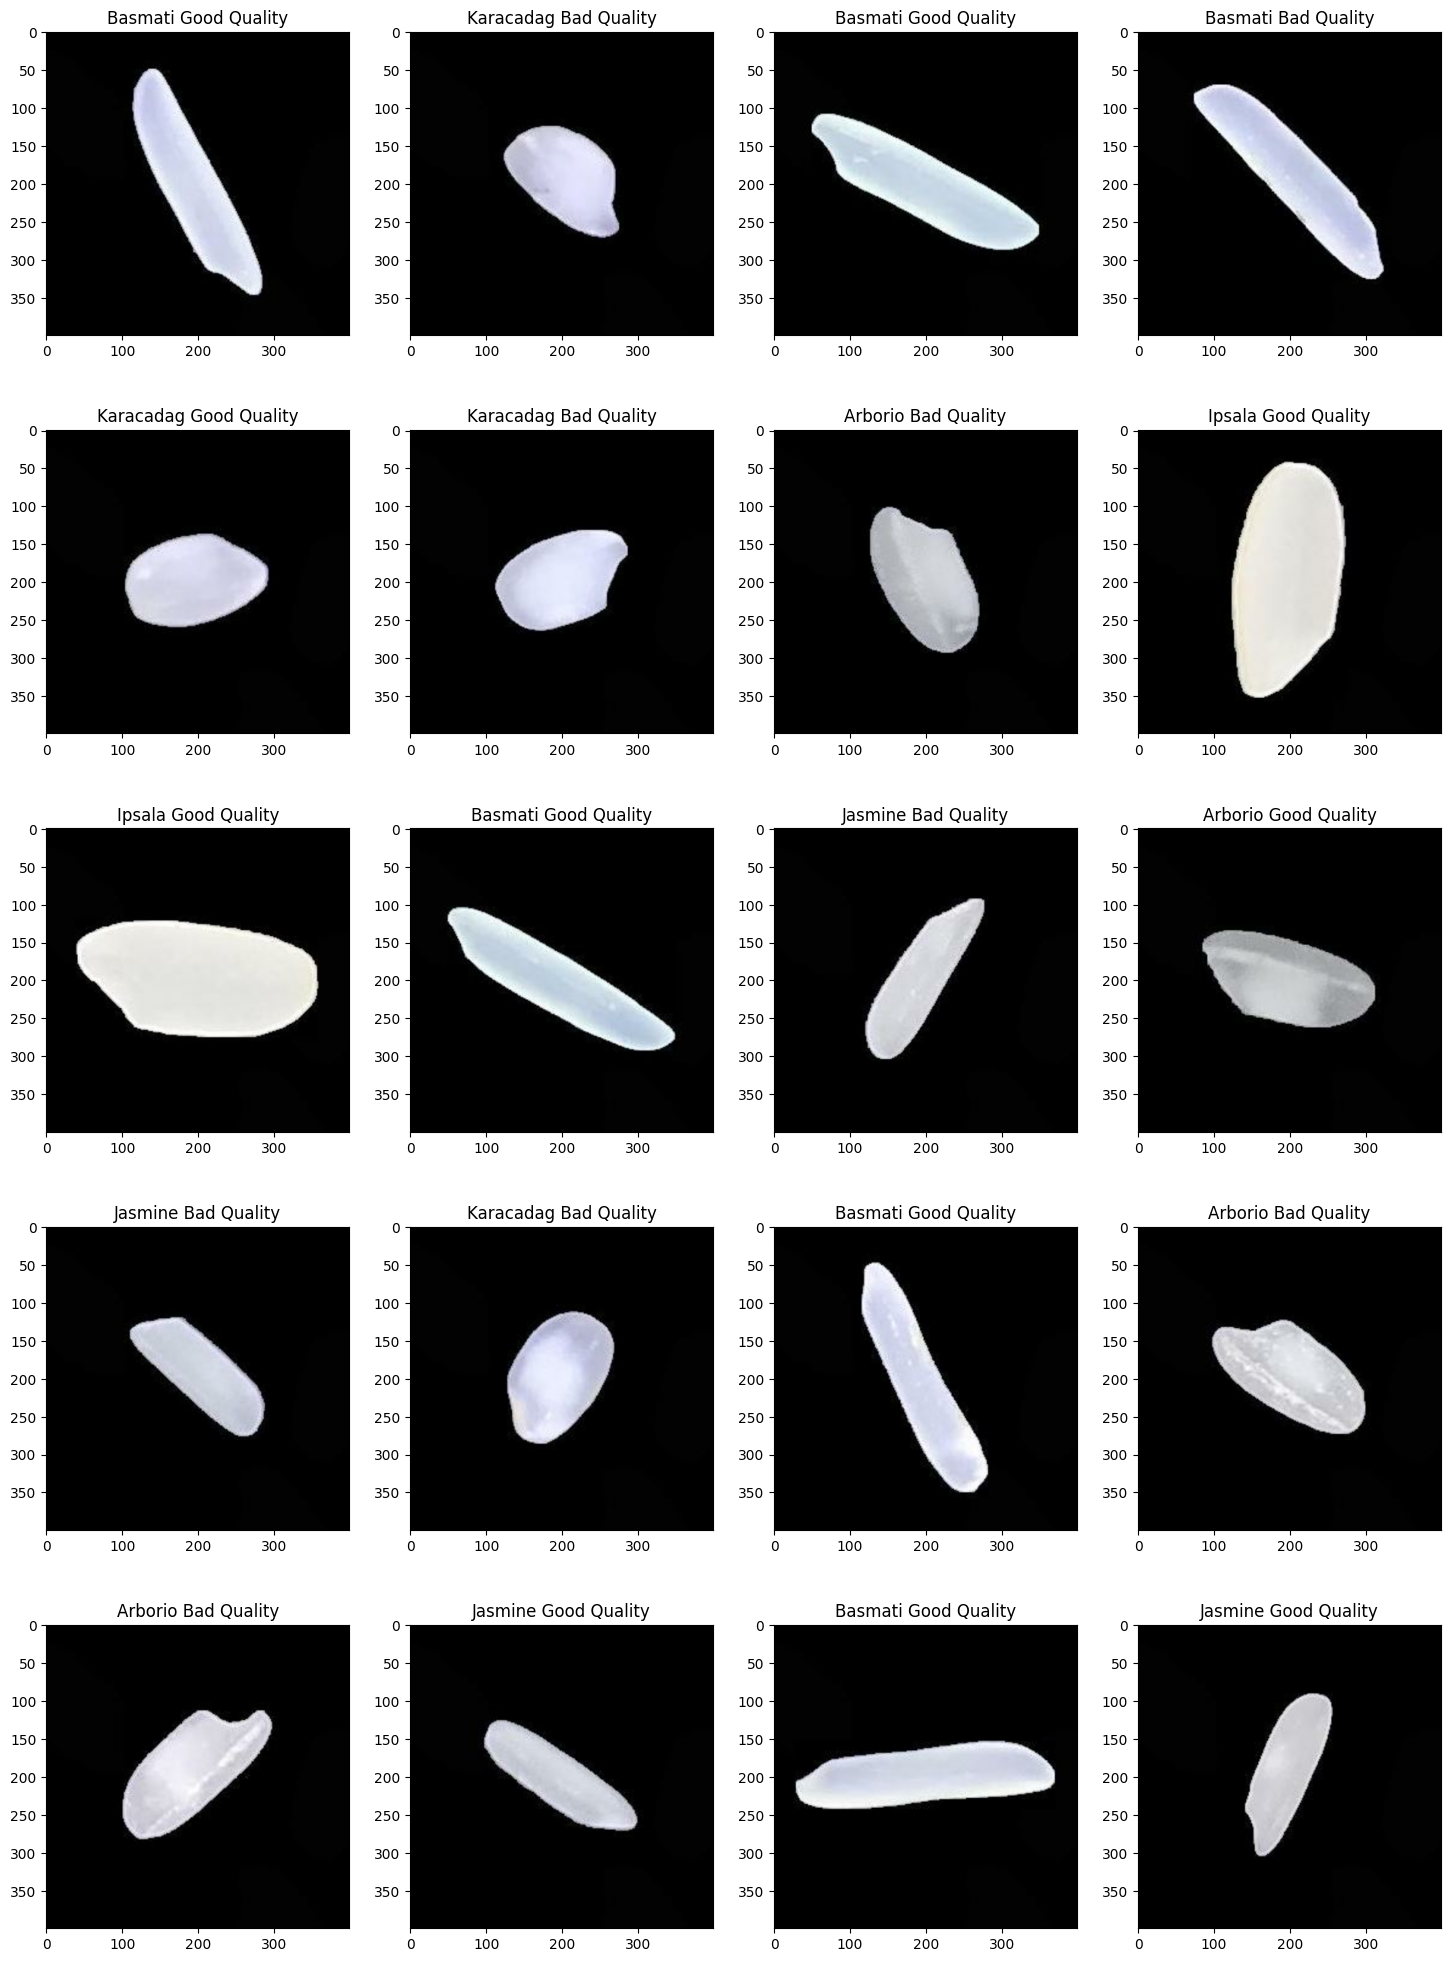

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,25))

# Randomly sample 20 rows from the dataframe
random_samples = df.sample(20)

for i, (index, row) in enumerate(random_samples.iterrows()):
    plt.subplot(5, 4, i + 1)

    image = tf.io.read_file(row['Image_path'])
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [400, 400])

    plt.imshow(image)
    plt.title(row['Label_Quality'])

plt.show()

#TRAIN TEST SPLIT

In [30]:
X = df['Image_path']
y = df['Label_Quality']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42,stratify=y)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10500,), (4500,), (10500,), (4500,))

#ENCODING TARGET LABELS

In [33]:
Train_image_labels, unique_labels = pd.factorize(y_train)
Test_image_labels = pd.Series(y_test).map({label: i for i, label in enumerate(unique_labels)}).values


In [34]:
Train_image_paths = X_train.values.tolist()
Test_image_paths = X_test.values.tolist()

In [35]:
import tensorflow as tf
import numpy as np

def parse_function(filename, label):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, [400, 400])
    y = tf.one_hot(tf.cast(label, tf.uint8), 120)
    return image, y

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.image.random_hue(image, 0.08)
    image = tf.image.random_saturation(image, 0.6, 1.5)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, 0.7, 1.3)
    return image, label

def tfdata_generator(images, labels, is_training, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    dataset = dataset.map(parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if is_training:
        dataset = dataset.shuffle(18000)
        dataset = dataset.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    dataset = dataset.batch(batch_size, drop_remainder=True if is_training else False)
    dataset = dataset.repeat()
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset


In [36]:
batch_size = 32

In [37]:
from tensorflow.python.framework import test_util
train_generator       = tfdata_generator(Train_image_paths, Train_image_labels, is_training=True)
test_generator  = tfdata_generator(Test_image_paths, Test_image_labels, is_training=False)

In [38]:

import math

steps_per_epoch = math.ceil(len(Train_image_paths) / batch_size)
validation_steps = math.ceil(len(Test_image_paths) / batch_size)


In [39]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet152
from keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,GlobalAveragePooling2D,Concatenate,BatchNormalization
from keras.models import Model
from keras.utils import plot_model
import os
import random as rn

In [40]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [41]:
keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)

In [42]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [43]:

input_shape = (400, 400, 3)
input_layer = Input(shape=input_shape)

# First model - InceptionV3 base
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_inception.layers:
    layer.trainable = True
model_inception = base_inception(input_layer)

# Additional Convolutional Layers
x = Conv2D(64, (3, 3), activation='relu')(model_inception)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# Pooling and Flatten
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

# Dense Layers with Batch Normalization and Dropout
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Output Layer
output = Dense(120, activation='softmax')(x)

# Final Model
Inception = Model(inputs=input_layer, outputs=output)

87910968/87910968 [==============================] - 3s 0us/step


In [44]:
Inception.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
Inception.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 11, 11, 2048)      21802784  
                                                                 
 conv2d_94 (Conv2D)          (None, 9, 9, 64)          1179712   
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)         0         
 g2D)                                                        

In [45]:
es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint('/content/drive/MyDrive/Capstone_Lavs/best_Final.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

# Fit the Model


In [46]:
history = Inception.fit(train_generator, steps_per_epoch=steps_per_epoch, validation_data=test_generator, epochs=10, validation_steps=validation_steps, callbacks=[mc, reduce_lr, es])

Epoch 1/10
329/329 [==============================] - ETA: 0s - loss: 1.0726 - categorical_accuracy: 0.6440
Epoch 1: val_loss improved from inf to 14.85067, saving model to /content/drive/MyDrive/Capstone_Lavs/best_Final.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



329/329 [==============================] - 151s 307ms/step - loss: 1.0726 - categorical_accuracy: 0.6440 - val_loss: 14.8507 - val_categorical_accuracy: 0.1542 - lr: 0.0010
Epoch 2/10
329/329 [==============================] - ETA: 0s - loss: 0.4178 - categorical_accuracy: 0.8573
Epoch 2: val_loss improved from 14.85067 to 0.30072, saving model to /content/drive/MyDrive/Capstone_Lavs/best_Final.h5
329/329 [==============================] - 96s 292ms/step - loss: 0.4178 - categorical_accuracy: 0.8573 - val_loss: 0.3007 - val_categorical_accuracy: 0.8982 - lr: 0.0010
Epoch 3/10
329/329 [==============================] - ETA: 0s - loss: 0.3609 - categorical_accuracy: 0.8771
Epoch 3: val_loss did not improve from 0.30072
329/329 [==============================] - 90s 275ms/step - loss: 0.3609 - categorical_accuracy: 0.8771 - val_loss: 0.3266 - val_categorical_accuracy: 0.8840 - lr: 0.0010
Epoch 4/10
329/329 [==============================] - ETA: 0s - loss: 0.2880 - categorical_accuracy: 0

In [47]:
import matplotlib.pyplot as plt

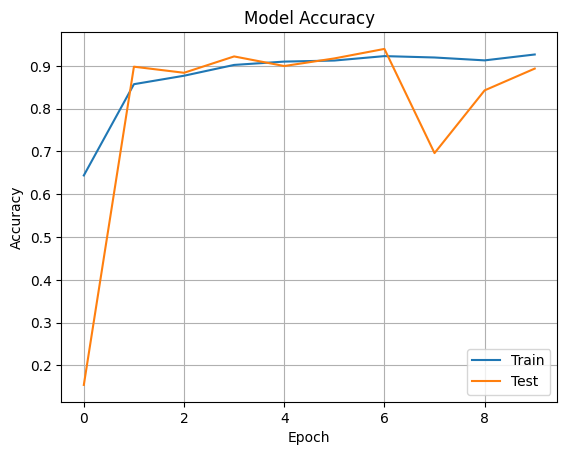

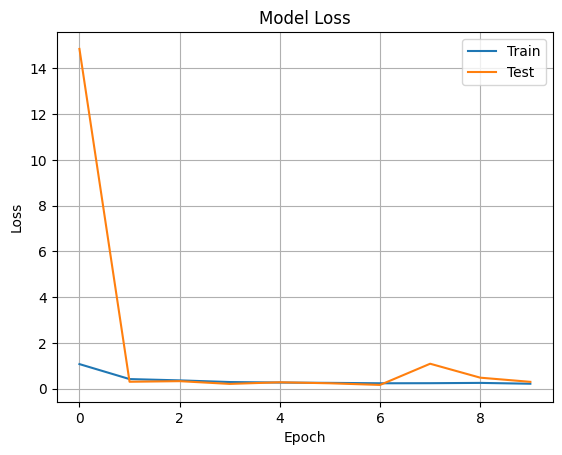

In [48]:
# accuracy plot
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()